In [1]:
%matplotlib inline


Fit Multiple Data Sets
======================

Fitting multiple (simulated) Gaussian data sets simultaneously.

All minimizers require the residual array to be one-dimensional. Therefore, in
the ``objective`` we need to ```flatten``` the array before returning it.

TODO: this should be using the Model interface / built-in models!


In [60]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit
from lmfit import Parameters, minimize, report_fit


def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params['amp_%i' % (i+1)]
    cen = params['cen_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return gauss(x, amp, cen, sig)


def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

Create five simulated Gaussian data sets



In [52]:
dum1, dum2 = data.shape

In [47]:
x = np.linspace(-1, 2, 20)
data = []
for i in np.arange(5):
    params = Parameters()
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

Create five sets of fitting parameters, one per data set



In [48]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

Constrain the values of sigma to be the same for all peaks by assigning
sig_2, ..., sig_5 to be equal to sig_1.



In [49]:
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr = 'sig_1'

Run the global fit and show the fitting result



In [53]:
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

[[Variables]]
    amp_1:  9.54701113 +/- 0.08659596 (0.91%) (init = 0.5)
    cen_1:  0.34849682 +/- 0.00311697 (0.89%) (init = 0.4)
    sig_1:  0.26095782 +/- 0.00172626 (0.66%) (init = 0.3)
    amp_2:  7.41094102 +/- 0.08427679 (1.14%) (init = 0.5)
    cen_2:  0.03893396 +/- 0.00401538 (10.31%) (init = 0.4)
    sig_2:  0.26095782 +/- 0.00172626 (0.66%) == 'sig_1'
    amp_3:  4.31843647 +/- 0.08188866 (1.90%) (init = 0.5)
    cen_3: -0.08142456 +/- 0.00689086 (8.46%) (init = 0.4)
    sig_3:  0.26095782 +/- 0.00172626 (0.66%) == 'sig_1'
    amp_4:  8.32996265 +/- 0.08521056 (1.02%) (init = 0.5)
    cen_4:  0.40840510 +/- 0.00357237 (0.87%) (init = 0.4)
    sig_4:  0.26095782 +/- 0.00172626 (0.66%) == 'sig_1'
    amp_5:  7.94056417 +/- 0.08480287 (1.07%) (init = 0.5)
    cen_5:  0.56666000 +/- 0.00374756 (0.66%) (init = 0.4)
    sig_5:  0.26095782 +/- 0.00172626 (0.66%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(amp_1, sig_1) = -0.365
    C(sig_1, amp_4) = -0

Plot the data sets and fits



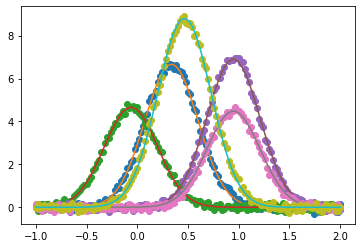

In [8]:
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()

Let's see if we can extend to fitting a complex model with the class based approach.
First, definine the basic model equation

In [87]:
int(len(fit_params) / 3)


1

In [85]:
if len(fit_params) % 2 != 0:
    print('Incorrect structure of fitting parameters')


Incorrect structure of fitting parameters


In [81]:
Chimult(x, fit_params)

TypeError: 'float' object cannot be interpreted as an integer

In [1]:
def Chimult(x, params):
    model = []
    if len(params) % 3 != 0:
        print('Incorrect structure of fitting parameters')
        return
    sets = int(len(par))
    
    for i in range(len(params)/3):
        print(i)
    return []

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit
from lmfit import Parameters, minimize, report_fit

def Chi(x, amp, l_d, sig):
    """Dimensionless concentration for 1-dimensional bulk diffusion-only model"""
    return amp * np.exp(-x / l_d * np.sqrt(1 + 1j * sig))

def ChiSing(x, amp, l_d, sig):
    """Dimensionless concentration for 1-dimensional bulk diffusion-only model"""
    return amp * np.exp(-x / l_d * np.sqrt(1 + 1j * sig))

def Chialt(x, amp_1, l_d_1, sig_1):
    """Dimensionless concentration for 1-dimensional bulk diffusion-only model"""
    return amp_1 * np.exp(-x / l_d_1 * np.sqrt(1 + 1j * sig_1))

def Chidataset(params, i, x):
    """Calculate Chi lineshape from parameters for data set"""
    amp = params['amp_%i' % (i+1)]
    l_d = params['l_d_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return Chi(x, amp, l_d, sig)


Use bare minimum (?) for defining the class

In [8]:
class ChiModel(lmfit.model.Model):
    
    def __init__(self, *args, **kwargs):
        super(ChiModel, self).__init__(ChiSing, *args, **kwargs)
        
#     def _residual(self, params, data, weights, **kwargs):
#         """Return the residual.
#         Default residual: (data-model)*weights.
#         If the model returns complex values, the residual is computed by
#         treating the real and imaginary parts separately. In this case,
#         if the weights provided are real, they are assumed to apply
#         equally to the real and imaginary parts. If the weights are
#         complex, the real part of the weights are applied to the real
#         part of the residual and the imaginary part is treated
#         correspondingly.
#         Since the underlying scipy.optimize routines expect numpy.float
#         arrays, the only complex type supported is np.complex.
#         The "ravels" throughout are necessary to support pandas.Series.
        
        
#         Customized to accept fitting multiple datasets simultaneously.
#         """
#         model = self.eval(params, **kwargs)
#         if self.nan_policy == 'raise' and not np.all(np.isfinite(model)):
#             msg = ('The model function generated NaN values and the fit '
#                    'aborted! Please check your model function and/or set '
#                    'boundaries on parameters where applicable. In cases like '
#                    'this, using "nan_policy=\'omit\'" will probably not work.')
#             raise ValueError(msg)

#         diff = model - data

#         if diff.dtype == np.complex:
#             # data/model are complex
#             diff = diff.ravel().view(np.float)
#             if weights is not None:
#                 if weights.dtype == np.complex:
#                     # weights are complex
#                     weights = weights.ravel().view(np.float)
#                 else:
#                     # real weights but complex data
#                     weights = (weights + 1j * weights).ravel().view(np.float)
#         if weights is not None:
#             diff *= weights
#         return np.asarray(diff).ravel()  # for compatibility with pandas.Series

Make sure this still works...

C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


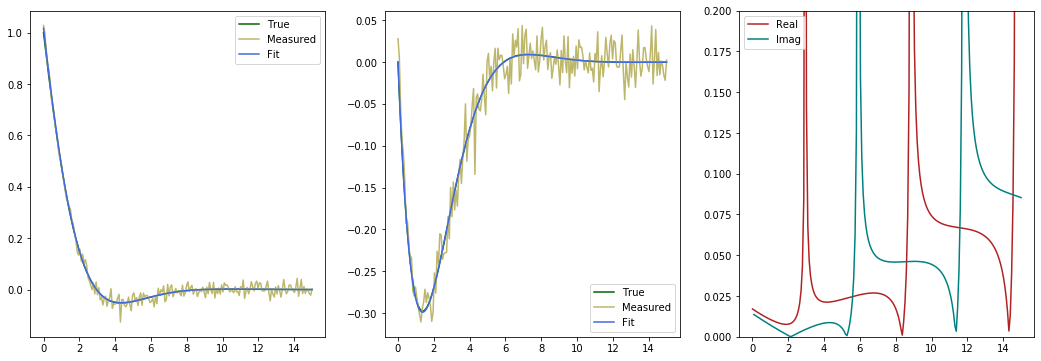

In [9]:
Chis = ChiModel()
real_params = Chis.make_params(amp=1, l_d=4, sig=10)

x = np. linspace(0, 15, 200)
true_chi = Chis.eval(params=real_params, x=x)

np.random.seed(158)
noise = np.random.normal(0, .02, true_chi.size)
meas_chi = true_chi + noise*(1 + 1j)

guess_params=Parameters()
guess_params.add('amp', value=.8)
guess_params.add('l_d', value=2.1)
guess_params.add('sig', value=.8)

result = Chis.fit(meas_chi, params=guess_params, x=x, verbose=True)
fit_chi = Chis.eval(params=result.params, x=x)
guess_chi = Chis.eval(params=guess_params, x=x)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1,figsize=(18,6))
ax1.plot(x, np.real(true_chi), color='darkgreen', label='True')
ax1.plot(x, np.real(meas_chi), color='darkkhaki', label='Measured')
ax1.plot(x, fit_chi.real, color='royalblue', label='Fit')
ax1.legend()

ax2.plot(x, np.imag(true_chi), color='darkgreen', label='True')
ax2.plot(x, np.imag(meas_chi), color='darkkhaki',  label='Measured')
ax2.plot(x, fit_chi.imag, color='royalblue', label='Fit')
ax2.legend()

ax3.plot(x, abs(fit_chi.real-np.real(true_chi))/abs(np.real(true_chi)), color='firebrick', label='Real')
ax3.plot(x, abs(fit_chi.imag-np.imag(true_chi))/abs(np.imag(true_chi)), color='teal', label='Imag')
ax3.set_ylim(0,.2)
ax3.legend()

plt.show()

Cool! Cool cool cool. Now let's just modify everything in the Gaussian example to fit this model, but here we want to specify particular sigmas

In [87]:
def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - Chi_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [59]:
Chis.make_params(amp_1=1.2, l_d_1=5, amp=1)

name,value,initial value,min,max,vary
amp,1.00000000,None,-inf,inf,True
l_d,-inf,None,-inf,inf,True
sig,-inf,None,-inf,inf,True


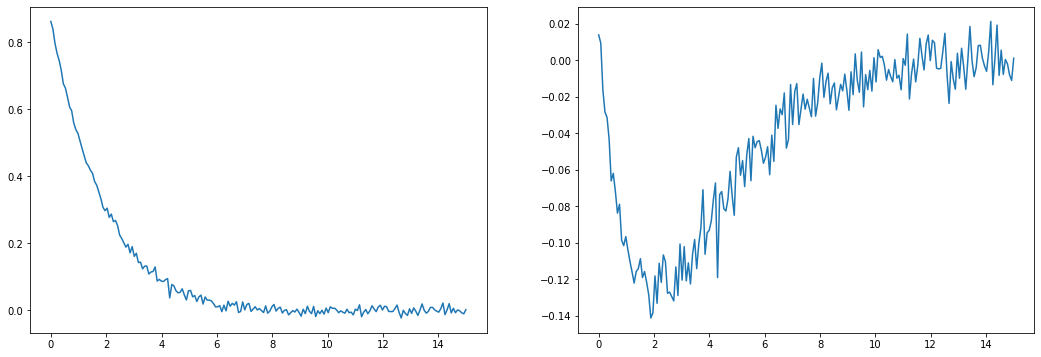

Parameters([('amp_1', <Parameter 'amp_1', 0.5, bounds=[0.0:200]>), ('l_d_1', <Parameter 'l_d_1', 0.4, bounds=[-2.0:10.0]>), ('sig_1', <Parameter 'sig_1', 0.3, bounds=[0.01:10.0]>)])


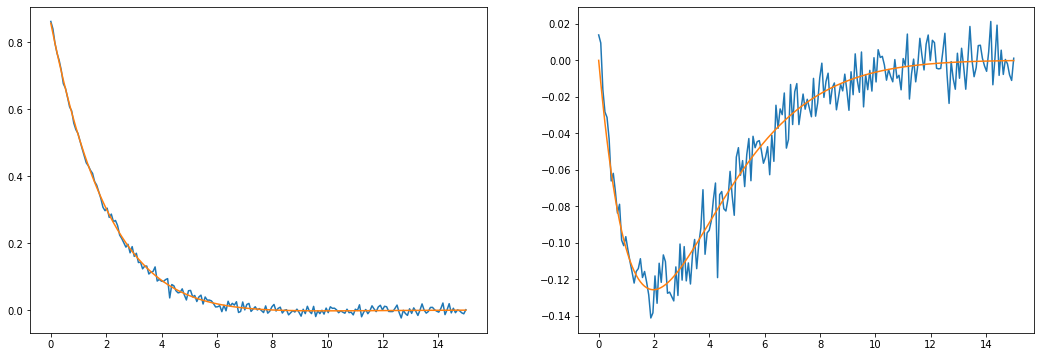

In [76]:
Chis = ChiModel()

x = np.linspace(0, 15, 200)

np.random.seed(158)
sigs= [1, 4, 16]
data = []
for i in np.arange(1):
    params = Parameters()
    amp = 0.8 + 0.50 * np.random.rand()
    l_d = 2 + 2 * np.random.rand()
    sig = sigs[i]
    dat = Chi(x, amp, l_d, sig) + np.random.normal(size=x.size, scale=0.01)*(1+ 1j)
    data.append(dat)
data = np.array(data)

fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('l_d_%i' % (iy+1), value=0.4, min=-2.0, max=10.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=10.0)

fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(18,6))
for i in range(1):
    ax1.plot(x, np.real(data[i, :]))
    ax2.plot(x, np.imag(data[i,:]))
plt.show()

print(fit_params)
result = Chis.fit(data, params=fit_params, x=x, verbose=True)

fit_chi = Chis.eval(params=result.params, x=x)

fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(18,6))

for i in range(1):
    ax1.plot(x, np.real(data[i, :]))
    ax1.plot(x, np.real(fit_chi[:]))
    
    ax2.plot(x, np.imag(data[i,:]))
    ax2.plot(x, np.imag(fit_chi[:]))
plt.show()

In [53]:
fit_params

name,value,initial value,min,max,vary
amp_1,0.50000000,0.5,0.00000000,200.000000,True
l_d_1,0.40000000,0.4,-2.00000000,2.00000000,True
sig_1,0.30000000,0.3,0.01000000,3.00000000,True


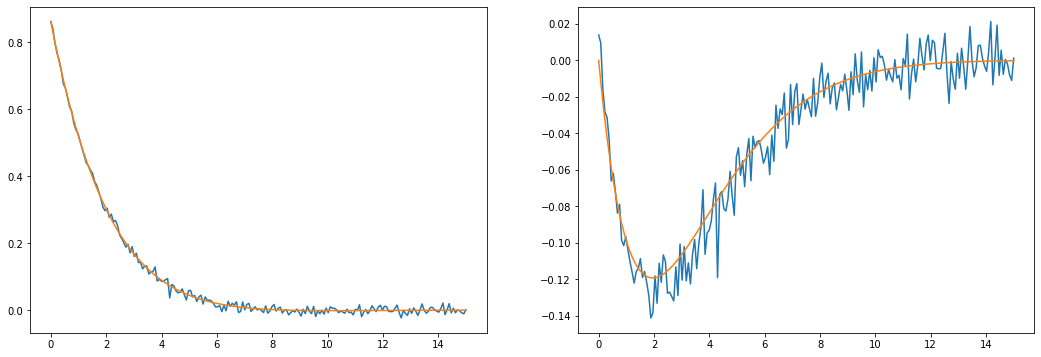

In [65]:
fit_params = Parameters()
fit_params.add('amp', value=0.5, min=0.0, max=2)
fit_params.add('l_d', value=3, min=0, max=20)
fit_params.add('sig', value=0.3, min=0.01, max=100.0)

result = Chis.fit(data, params=fit_params, x=x, verbose=True, weights=wts)

fit_chi = Chis.eval(params=result.params, x=x)

fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(18,6))

for i in range(1):
#     y_fit = gauss_dataset(out.params, i, x)
    ax1.plot(x, np.real(data[i, :]))
    ax1.plot(x, np.real(fit_chi[:]))
    
    ax2.plot(x, np.imag(data[i,:]))
    ax2.plot(x, np.imag(fit_chi[:]))
plt.show()

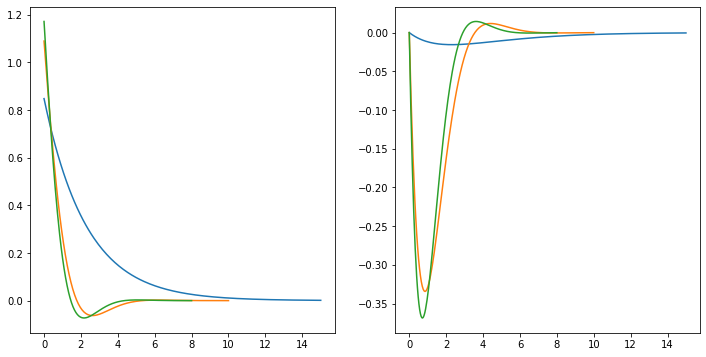

In [66]:
xfins = [15, 10, 8]

x = np.linspace(0, 15, 200)
xarr = []
lp_params = Parameters()
sigs = [.1, 16, 32]
np.random.seed(158)

for i in np.arange(3):
    lp_params.add('amp_%i' % (i+1), value=0.8 + 0.50 * np.random.rand(), min=0.0, max=10)
    lp_params.add('l_d_%i' % (i+1), value=2 + 2 * np.random.rand(), min=0.0, max=20)
    lp_params.add('sig_%i' % (i+1), value=sigs[i], min=0, max=100)
    xarr.append(np.linspace(0, xfins[i], 200))


data = []
for i in np.arange(3):
    data.append(Chidataset(lp_params, i, xarr[i]))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, y in enumerate(data):
    ax1.plot(xarr[i], np.real(y))
    ax2.plot(xarr[i], np.imag(y))

plt.show()

In [20]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('l_d_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)